In [ ]:
%pip install -r ../requirements.txt

In [2]:
from schema.WLD import WLD

wld = WLD(file_path="../data/example-chappy.wld")

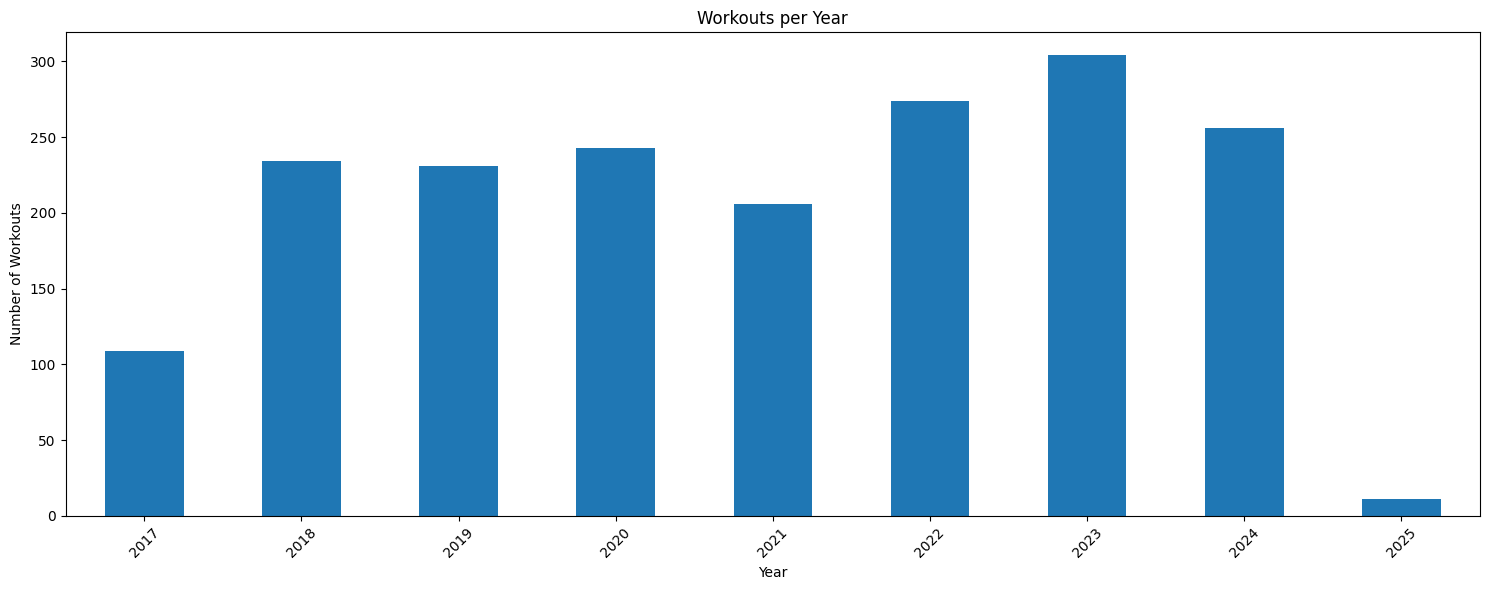

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract workout dates and convert to pandas datetime
workout_dates = [w.date for w in wld.workouts]
df = pd.DataFrame({"date": workout_dates})
df["date"] = pd.to_datetime(df["date"])  # Add this line to convert to datetime

# Create year column
df["year"] = df["date"].dt.to_period("Y")

# Count workouts per year
yearly_counts = df["year"].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(15, 6))
yearly_counts.plot(kind="bar")
plt.title("Workouts per Year")
plt.xlabel("Year")
plt.ylabel("Number of Workouts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

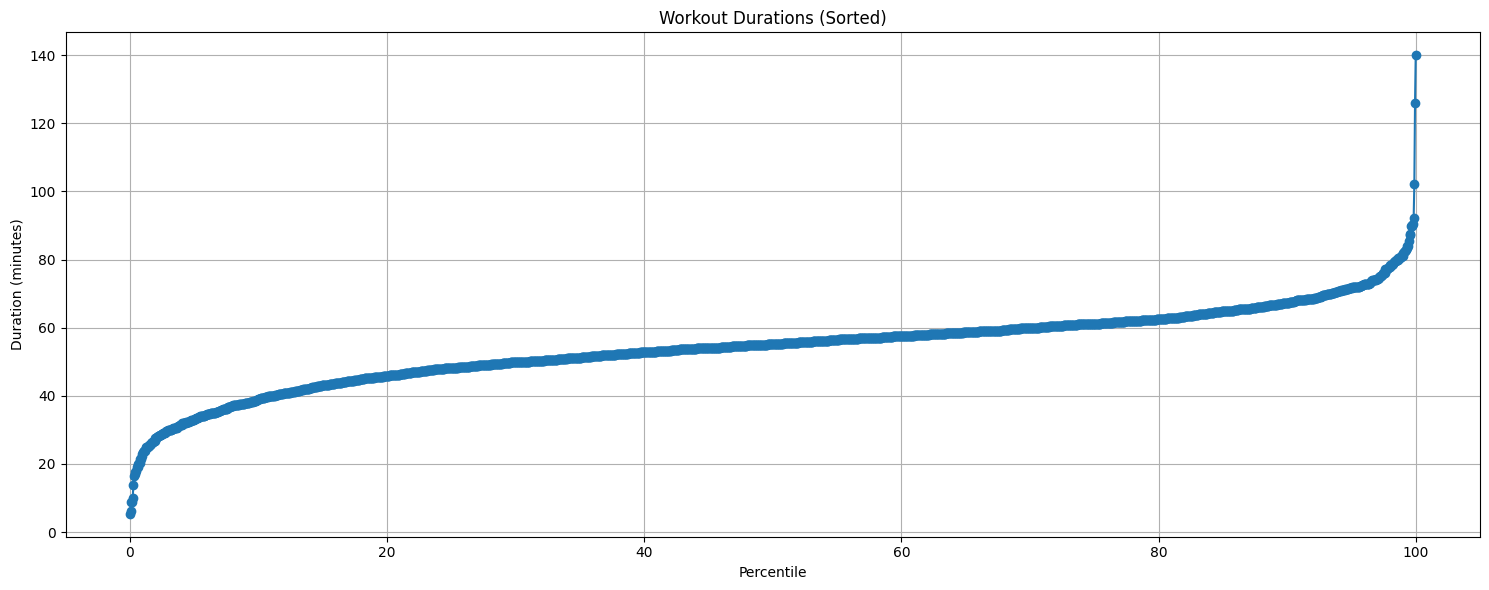

In [4]:
# Extract workout durations in seconds and convert to minutes
workout_durations = [w.duration / 60 for w in wld.workouts]
workout_dates = [w.date for w in wld.workouts]

# Create DataFrame with dates and durations
df_duration = pd.DataFrame({
    'date': workout_dates,
    'duration': workout_durations
})
df_duration['date'] = pd.to_datetime(df_duration['date'])

# Sort by duration
df_duration_sorted = df_duration.sort_values('duration')

# Plot
plt.figure(figsize=(15, 6))
plt.plot(
    [i * 100.0 / (len(df_duration_sorted) - 1) for i in range(len(df_duration_sorted))],
    df_duration_sorted['duration'],
    marker='o'
)
plt.title('Workout Durations (Sorted)')
plt.xlabel('Percentile')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Find gaps between workouts by calendar days
workout_dates_sorted = sorted(workout_dates)
gaps = []
streaks = []
streak_start = workout_dates_sorted[0]
current_streak_start = None

for i in range(1, len(workout_dates_sorted)):
    days_diff = (workout_dates_sorted[i] - workout_dates_sorted[i-1]).days
    if days_diff > 2:
        # End previous streak
        streak_end = workout_dates_sorted[i-1]
        streak_days = (streak_end - streak_start).days + 1
        streaks.append((streak_days, streak_start, streak_end))
        # Start new streak
        streak_start = workout_dates_sorted[i]
        gaps.append((days_diff, workout_dates_sorted[i]))
    elif i == len(workout_dates_sorted)-1:
        # Handle final streak
        streak_end = workout_dates_sorted[i]
        streak_days = (streak_end - streak_start).days + 1
        streaks.append((streak_days, streak_start, streak_end))

# Check if current streak is ongoing
from datetime import datetime
last_workout = workout_dates_sorted[-1]
days_to_now = (datetime.now() - last_workout).days
if True: # days_to_now <= 2: (assume current streak)
    current_streak = (days_to_now + 1, last_workout, datetime.now())
    streaks.append(current_streak)

# Count gaps by year
gaps_by_year = {}
for _, date in gaps:
    year = date.year
    gaps_by_year[year] = gaps_by_year.get(year, 0) + 1

# Display gaps by year
print("\nNumber of 2+ day gaps by year:")
print("-----------------------------")
for year in sorted(gaps_by_year.keys()):
    print(f"{year}: {gaps_by_year[year]} gaps")

# Display top 10 streaks
print("\nTop 10 longest streaks without 2+ day gaps:")
print("------------------------------------------")
for i, (days, start, end) in enumerate(sorted(streaks, reverse=True)[:10]):
    print(f"{i+1}. {days} days: {start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}")


Number of 2+ day gaps by year:
-----------------------------
2017: 4 gaps
2018: 23 gaps
2019: 18 gaps
2020: 21 gaps
2021: 19 gaps
2022: 19 gaps
2023: 6 gaps
2024: 8 gaps
2025: 2 gaps

Top 10 longest streaks without 2+ day gaps:
------------------------------------------
1. 115 days: 2024-04-14 to 2024-08-07
2. 107 days: 2023-08-27 to 2023-12-12
3. 95 days: 2024-09-25 to 2024-12-29
4. 94 days: 2023-01-10 to 2023-04-13
5. 93 days: 2023-05-23 to 2023-08-24
6. 73 days: 2024-01-08 to 2024-03-21
7. 64 days: 2017-09-19 to 2017-11-21
8. 51 days: 2022-08-08 to 2022-09-27
9. 47 days: 2020-04-10 to 2020-05-27
10. 46 days: 2022-10-02 to 2022-11-17


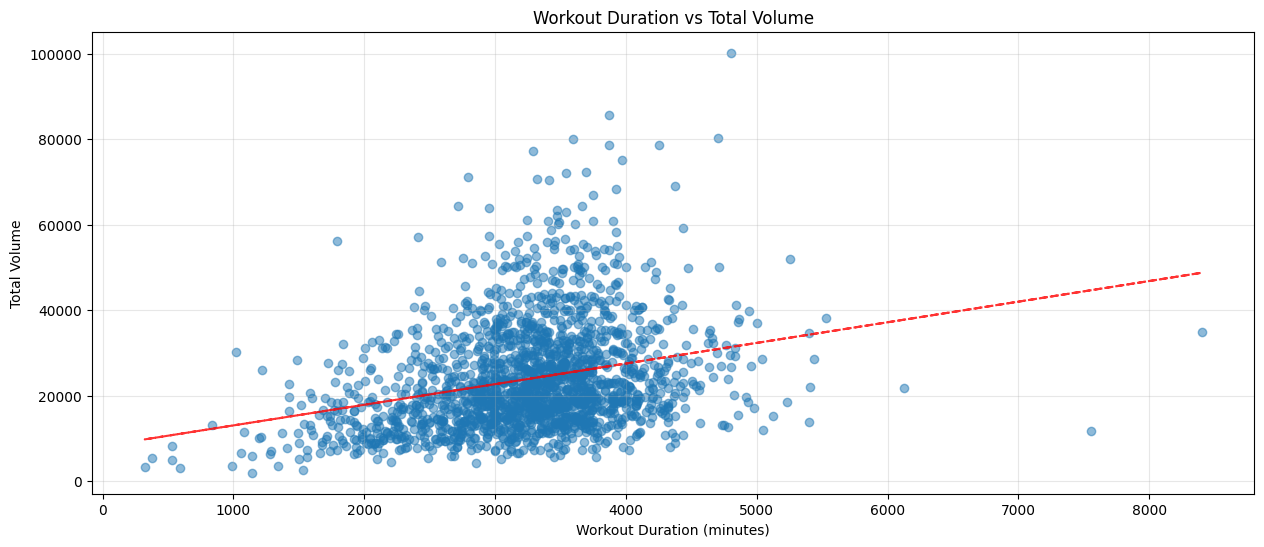

In [8]:
# Extract workout durations and total volumes
durations = []
volumes = []

for workout in wld.workouts:
    total_volume = 0
    for exercise in workout.exercises:
        for set in exercise.sets:
            if set.volume:
                total_volume += set.volume

    durations.append(workout.duration)
    volumes.append(total_volume)

# Create scatter plot
plt.figure(figsize=(15,6))
plt.scatter(durations, volumes, alpha=0.5)
plt.xlabel('Workout Duration (minutes)')
plt.ylabel('Total Volume')
plt.title('Workout Duration vs Total Volume')

# Add trend line
import numpy as np
z = np.polyfit(durations, volumes, 1)
p = np.poly1d(z)
plt.plot(durations, p(durations), "r--", alpha=0.8)

plt.grid(True, alpha=0.3)
plt.show()
